In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Week 2 - Portfolio Optimization

- Mean-Variance Framework
- Finding the optimal combination of risk and return between a bundle of assets
- Mean return is linear, follows distributive property, but risk depends on the correlation of the assets
- If they're correlated, then we can take an "average", if they're uncorrelated the average risk is lower


## Efficient Frontier

<AxesSubplot:>

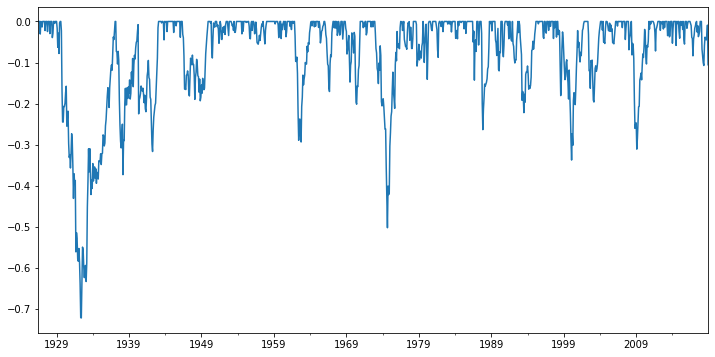

In [2]:
ind = erk.get_ind_returns()
ind.shape

# computing drawdowns for Food industry
erk.drawdown(ind['Food'])['drawdown'].plot.line(figsize=(12, 6))

In [3]:
erk.var_gaussian(ind[['Food', 'Smoke', 'Coal', 'Beer', 'Fin']], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [18]:
erk.var_gaussian(ind, modified=True).sort_values().tail()


Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [5]:
erk.var_gaussian(ind, modified=True).sort_values().head()


Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<AxesSubplot:title={'center':'Industry Sharpe-Ratio'}>

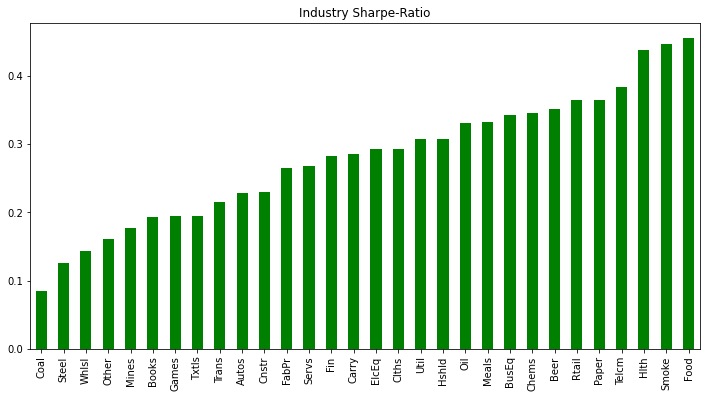

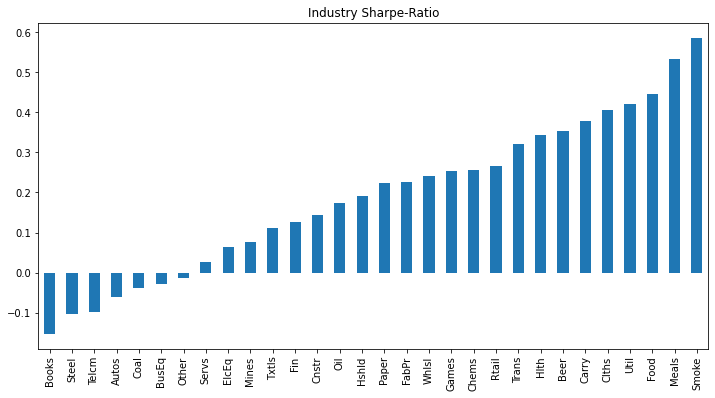

In [6]:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar(figsize=(12, 6))

# now we can calculate the Sharpe ratio of the assets in the dataset
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(figsize=(12, 6), title='Industry Sharpe-Ratio',
                                                       color='green')
plt.figure()
erk.sharpe_ratio(ind['2000':], 0.03, 12).sort_values().plot.bar(figsize=(12, 6), title='Industry Sharpe-Ratio')

Now we can calculate the efficient frontier. First as an in-sample exercise because we don't have the expected returns

In [19]:
# expected returns, in this case they're the real returns
er = erk.annualize_rets(ind["1996":"2000"], periods_per_year=12)

# covariance matrix of the assets
cov = ind["1996":"2000"].cov()

# square, symmetric, the diagonal is the variance of the assets.
cov


KeyError: '2000'

## Markowitz Portfolio Theory - Efficient Frontier

When we add assets, we start to get new curves and then we can mix the bundles of assets. This expands the space of
portfolios that can be constructed. We go from a curve to region. You should not hold a portfolio in the interior of
the region, you can go 'left' (lower risk) or 'up' (higher return).

A Mean-Variance investor should only care about the frontier.

In [8]:
# time to draw the efficient frontier

l = ['Food', 'Beer', 'Smoke', 'Coal']
er[l]


cov.loc[l, l]

weights = np.repeat(1/4, 4)
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [9]:
erk.portfolio_vol(weights, cov.loc[l, l])

0.055059195776437045

### A Two-Asset Frontier

<AxesSubplot:xlabel='Vol'>

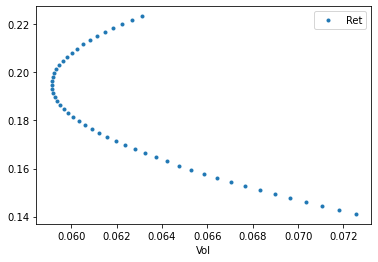

In [10]:
l = ['Fin', 'Beer']
erk.plot_ef2(50, er[l], cov.loc[l, l], style='.')

In [11]:
cov = ind["1996":"2000"].cov()

## Finding the optimal portfolio for N-assets using Quadratic Programming

<AxesSubplot:xlabel='Vol'>

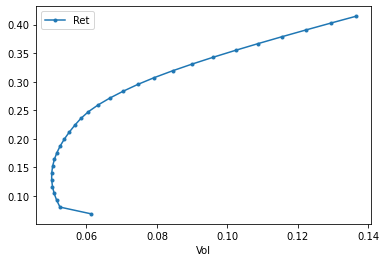

In [12]:
l = ['Fin', 'Games']
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l, l])
# The minimum volatility for given return, 15% in this case
vol15 = erk.portfolio_vol(w15, cov.loc[l, l])
vol15

# let's try the quadprog on several assets
l = ['Smoke', 'Fin', 'Games', 'Coal']
erk.plot_efn(30, er[l], cov.loc[l, l])



# The Capital Market Line

How does the shape of the efficient frontier changes in the presence of a risk-free asset. Adding a risk-free assets
increases the number of available portfolios. To find the capital market line we must find the tangent line between
a point in the efficient frontier and the riks-free asset. That portfolio, tangent to that line, is called the
Tangency Portfolio or Max Sharpe Ratio Portfolio (MSR).

In  the pressence of a RISK-FREE asset the Efficient Frontier becomes a straight line: Capital Market Line. So an
investor should hold a share in the risk-free asset and other in the portfolio.

It is the portfolio that gives the highest return per unit of risk. Contains no exposure to unrewarded risks, only
systematic risk. The calculation requires EXPECTED returns.

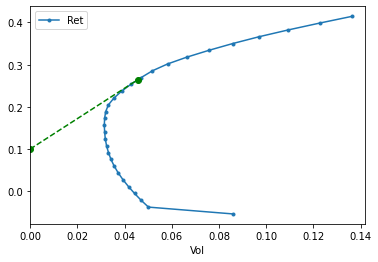

In [13]:
ax = erk.plot_efn(30, er, cov)
ax.set_xlim(left=0)
rf = 0.1
w_msr = erk.msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)

# Now we plot the Capital Market Line
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed')

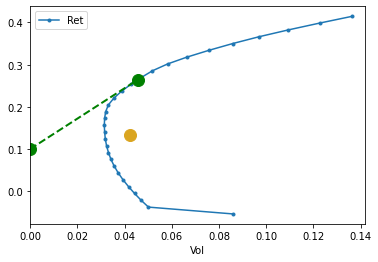

In [16]:
ax = erk.plot_efn(30, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

## Global Minimum Variance Portfolio

Applying Markowitz requires robust estimates of the expected returns and the variance-covariance matrix, but returns
are very noisy, so investment managers concentrate on the portfolio that doesn't require return estimates: the Global
Minimum Variance Portfolio.


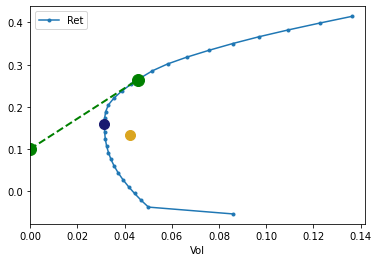

In [17]:
ax = erk.plot_efn(30, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

